In [1]:
# libraries required
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [31]:
# load file
df = pd.read_csv(r'C:\Users\HP\python\clustering\cluster.csv')
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [32]:
df.tail()

,Age,Income
17,41,63000
18,43,64000
19,39,80000
20,41,82000
21,39,58000


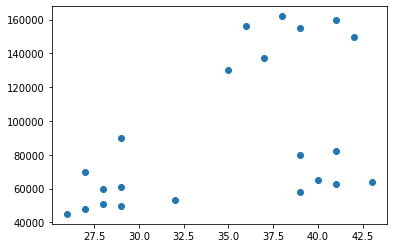

In [4]:
plt.scatter(df['Age'], df['Income'])

In [33]:
# Scaling attributes from 0 to 1

scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [20]:
df.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


# Elbow Method

In [17]:
# To find Number of clusters

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

In [18]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.26640301246684156,
 0.22624835214667532,
 0.16869711728567788,
 0.13762504146528043,
 0.10188787724979426]

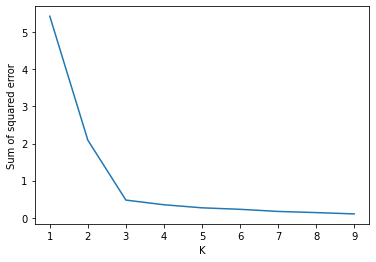

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Fitting KMeans model

In [23]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [24]:
# fitting and predicting the model
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [34]:
df['cluster'] = y_predicted
df

,Age,Income,cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2
5,0.764706,0.940171,2
6,0.882353,0.982906,2
7,0.705882,1.000000,2
8,0.588235,0.948718,2
9,0.529412,0.726496,2


In [30]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

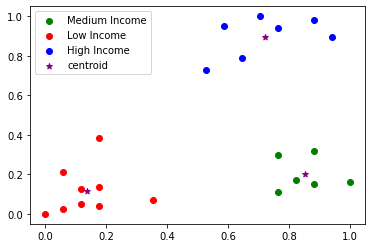

In [36]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1['Income'], color = 'green', label = 'Medium Income')
plt.scatter(df2.Age, df2['Income'], color = 'red', label = 'Low Income')
plt.scatter(df3.Age, df3['Income'], color = 'blue', label = 'High Income')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()